# Pymaceuticals Inc.
---

### Analysis

- Observation 1:
- When comparing the all the various drug testing alogside the number of observed mouse timepoints, it is shown that Capomulin has the largest amount of timepoints measured. In contrast drugs such as Infubinol and Propriva show a lower amount of timepoints observed. From this it is fair to assume that Capomulin data would be more comprehesive for analytics on effectiveness of the drug throughout a period of time.
-------------------------------------------------------------------------------------------------------------------------------

- Observation 2:
- When comparing the tumor size with the timepoints measured for the individual mouse l509 in the Capomuolin study. It is show that the drug does not show any positive effects on tumor size until 20 days in where it starts to show a sharp decline in the mouse's tumor size; only to slighly rise at the 35 day mark. This indicates that the drug does not instantly show a shrinking effect on tumor size, but through a larger timeframe shows positive effects.
-------------------------------------------------------------------------------------------------------------------------------
- Observation 3:
- Through the comparision of Capomulin, Ramicane, Infubinol, Cefamin - Capomulin and Ramicane on average show stronger impacts on mouses' tumor volume then Infubinol and Ceftamin. When cleaning the data for outliers that might skew the data it is show that within Infubinol there was a mouse you had a greater reduction in tumor size compared to other mice, however other mice within this study showed minimum impact on tumor size from Infubinol.
------------------------------------------------------------------------------------------------------------------------------- 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
%matplotlib inline

# Study data files
mouse_metadata_path = Path("C:\\Users\\16474\\Desktop\\Module 5\\Pymaceuticals\\data\\Mouse_metadata.csv")
study_results_path = Path("C:\\Users\\16474\\Desktop\\Module 5\\Pymaceuticals\\data\\Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticlas_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
pymaceuticlas_complete.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [119]:
# Checking the number of mice.
mouse_count = len(pymaceuticlas_complete["Mouse ID"].unique())
mouse_count

249

In [120]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = pymaceuticlas_complete.loc[pymaceuticlas_complete.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouse["Mouse ID"].unique()

array(['g989'], dtype=object)

In [121]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = pymaceuticlas_complete.loc[pymaceuticlas_complete["Mouse ID"] == "g989", :]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [122]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pymaceuticlas = pymaceuticlas_complete.loc[pymaceuticlas_complete["Mouse ID"] != "g989", :]
clean_pymaceuticlas

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [123]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_pymaceuticlas["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_pymaceuticlas.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_median = clean_pymaceuticlas.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_var = clean_pymaceuticlas.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_stdev = clean_pymaceuticlas.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_stderror = clean_pymaceuticlas.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                              "Median Tumor Volume":tumor_median,
                              "Tumor Volume Variance":tumor_var,
                              "Tumor Volume Std. Dev.": tumor_stdev,
                              "Tumor Volume Std. Err.":tumor_stderror,
                             })
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregation_method = clean_pymaceuticlas.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
aggregation_method


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

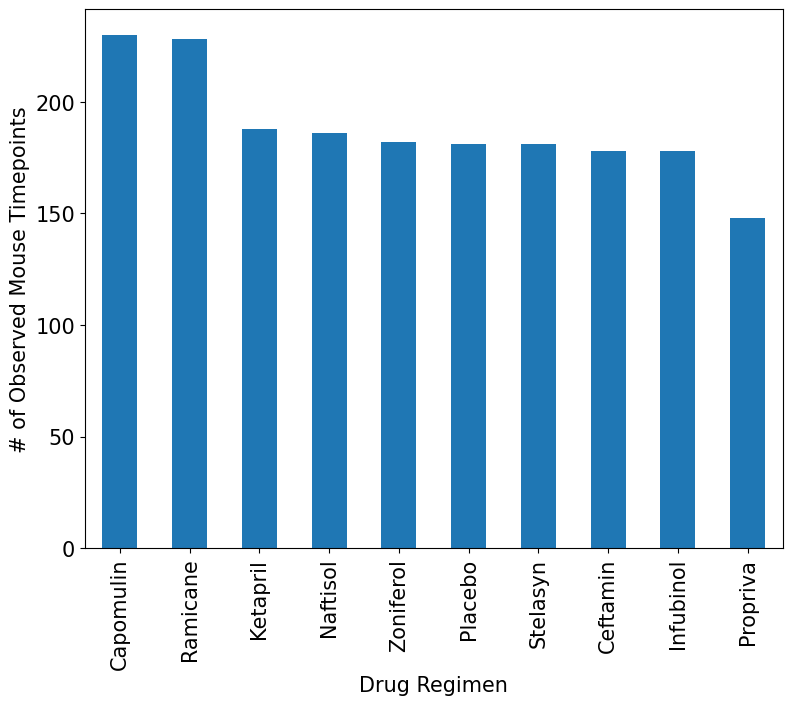

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_chart = clean_pymaceuticlas.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)

bar_chart = timepoint_chart.plot(kind="bar", figsize =(9,7), fontsize=15)
bar_chart.set_xlabel("Drug Regimen", fontsize = 15)
bar_chart.set_ylabel("# of Observed Mouse Timepoints", fontsize = 15)

plt.show()

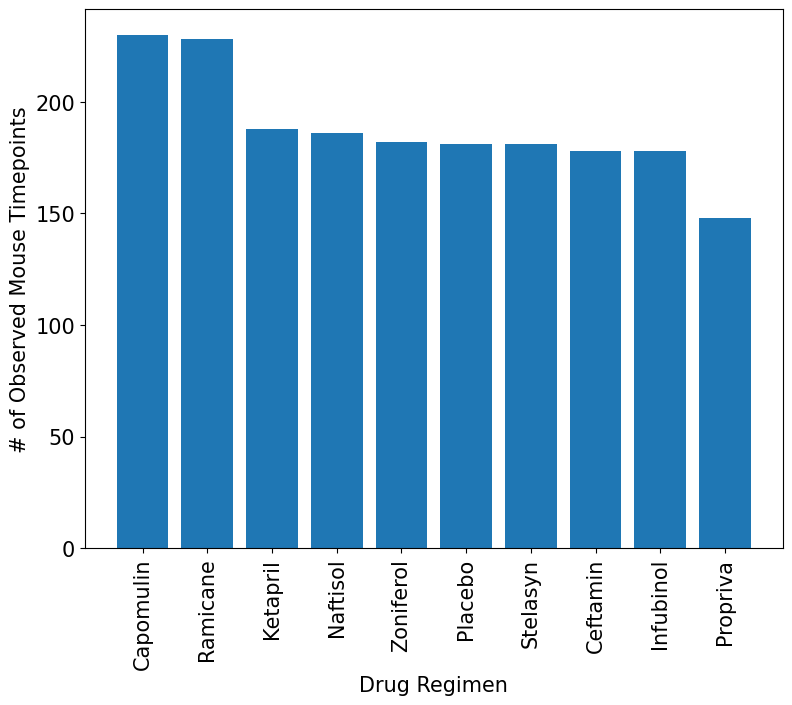

In [127]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
py_timepoint_chart = clean_pymaceuticlas.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)

x_axis = np.arange(len(py_timepoint_chart))
tick_labels = [value for value in x_axis]

plt.figure(figsize=(9,7))
plt.rcParams['font.size'] = 15
plt.bar(x_axis,py_timepoint_chart, align = "center")
plt.xticks(tick_labels,
           ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]
           , rotation ="vertical")
plt.xlabel("Drug Regimen", fontsize = 15)
plt.ylabel("# of Observed Mouse Timepoints", fontsize = 15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

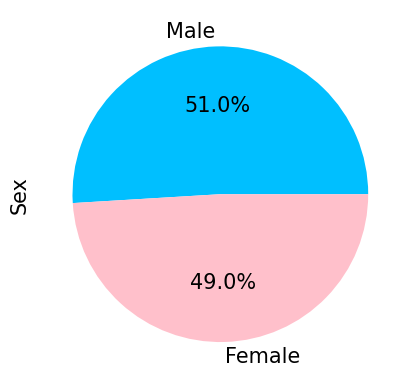

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = clean_pymaceuticlas["Sex"].value_counts()
gender_colours = ["deepskyblue","pink"]
gender.plot(kind="pie",autopct="%1.1f%%",colors = gender_colours)
plt.show

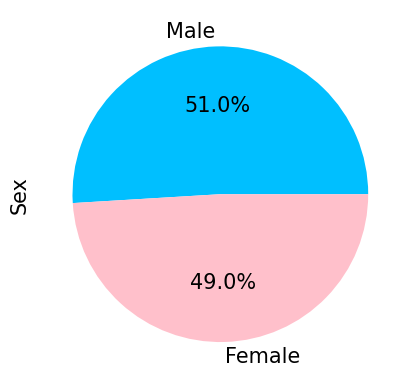

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

py_gender = clean_pymaceuticlas["Sex"].value_counts()
py_gender_colours = ["deepskyblue","pink"]
plt.pie(py_gender,labels=['Male','Female'],colors=py_gender_colours,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [130]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor = clean_pymaceuticlas.groupby(["Mouse ID"])["Timepoint"].max()
tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(clean_pymaceuticlas, tumor,on =["Mouse ID","Timepoint"], how = "right")
tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [131]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatment =["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]

    
for x in list_treatment:
    tumor_total = tumor_volume.loc[tumor_volume["Drug Regimen"] == x]["Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_total)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_total.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = tumor_total.loc[(tumor_total<lower_bound)|(tumor_total>upper_bound)]
    
    if len(outlier)==0:
        print(f"The tests for {x} has no potential outliers")
    else:
        print(f"{x}'s has potential outliers:{outlier}")
     
        print(outlier)

The tests for Capomulin has no potential outliers
The tests for Ramicane has no potential outliers
Infubinol's has potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The tests for Ceftamin has no potential outliers


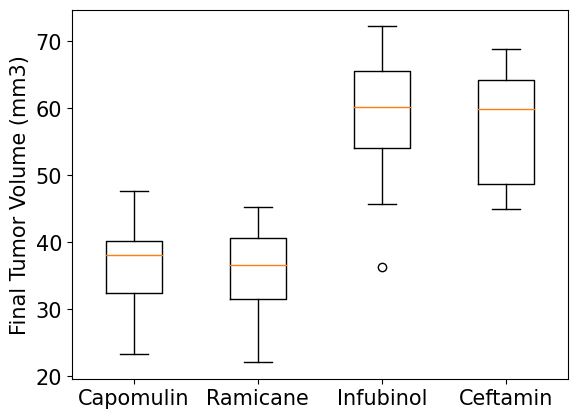

In [132]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels =list_treatment)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

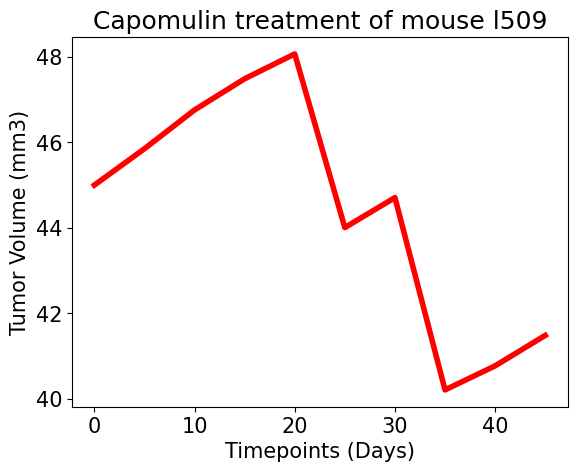

In [133]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_pymaceuticlas.loc[clean_pymaceuticlas["Drug Regimen"] == "Capomulin"]
individual_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509"]
mouse_tumorvlm = individual_mouse ["Tumor Volume (mm3)"]
mouse_timepoint = individual_mouse ["Timepoint"]
plt.plot(mouse_timepoint, mouse_tumorvlm, linewidth =4, color ="red")
plt.xlabel("Timepoints (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

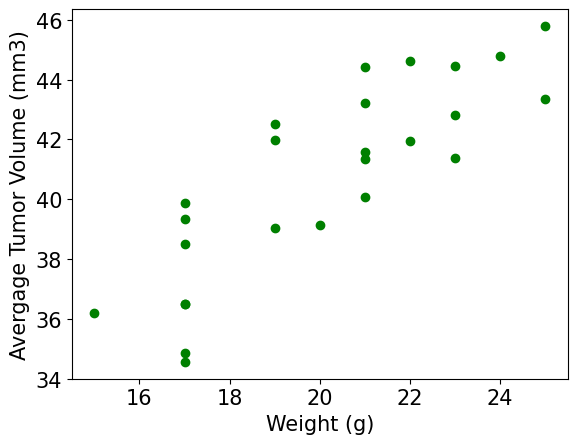

In [134]:
avg_capomulin = capomulin_data.groupby("Mouse ID").mean(numeric_only=True)
mouse_weight = avg_capomulin["Weight (g)"]
observe_time = avg_capomulin["Tumor Volume (mm3)"]

plt.scatter(mouse_weight,observe_time,color = "green")
plt.ylabel("Avergage Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


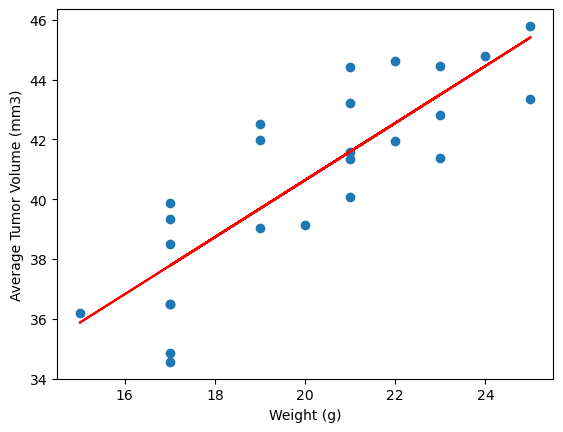

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
